# Prosper Loan Data Exploration
## by Dimitrios Karslidis

## Investigation Overview

>I wanted to investigate borrowers' history using Prosper Loan data to determine the factors that affect their Prosper Score. Based on these scores the investors make their decisions when it comes to lending money to the borrowers The range of scores vary from 0 (high risk) to 11 (low risk).
## Dataset Overview

> The original data consisted of approximately 114000 records (loans) and 80 attributes. Some of these features had missing values. After removing these missing values, the resulting dataset had approximately 76000 records. Also out 80 attributes we kept 8 and wanted to see whether they affect the borrowers' Prosper Score. These attributes are:
> * `ProsperScore`
> *`IncomeVerifiable`
> *`IsBorrowerHomeowner`
> *`RevolvingCreditBalance`
> *`DebtToIncomeRatio`
> *`StatedMonthlyIncome`
> *`CurrentDelinquencies`
> *`TotalInquires` 
> *`AvailableBankcardCredit`

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
data=pd.read_csv("cleanprosperloandata.csv")


## Distributions of attributes
Most of the variables have skewed distributions. However, applying a log transformation to some of these attributes their dstributions become more symmetric.


## Distribution of `ProsperScore`
Most of the borrowers have been assigned scores between 3 and 9 (more than 86%). However, the scores 4,6 and 8 are ones of the most frequent ones. Only 1.6% of borrowers have been assigned the best score (11->low risk) and 0.9% the worst score (1-> high risk).

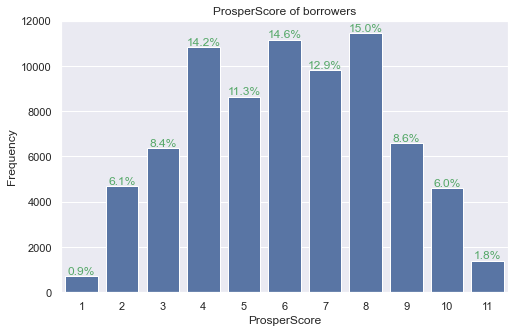

In [3]:
sb.set()
plt.figure(figsize=(8,5))
count=data["ProsperScore"].value_counts().sort_index()
rel_freq=count/count.sum()
rel_freq#compute the relative frequency for each level of the feature PropserScore
sb.countplot(data=data,x="ProsperScore",color=sb.color_palette()[0])
plt.title("ProsperScore of borrowers",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
for i in range(count.shape[0]):
    plt.text(i,count.iloc[i]+1,str(round(rel_freq.iloc[i]*100,1))+"%",ha="center",va="bottom",color="g")

## Distribution of `IsBorrowerHomeowner` and `IncomeVerifiable`
According to the below bar charts the income can be verified for the majority of the borrowers and there are almost two equal groups of borrowers who owe a home and who don't.

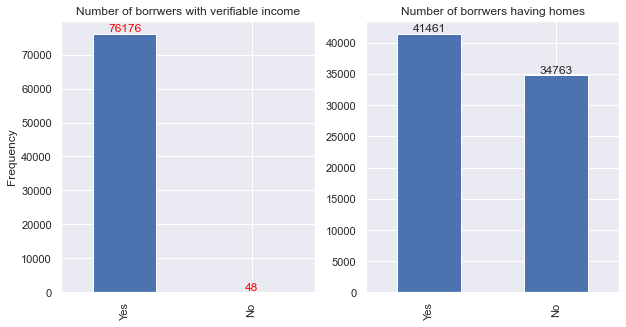

In [4]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
count_1=data.IncomeVerifiable.value_counts()#number of borrowers with verifiable income
count_1.plot(kind="bar",ax=ax[0])
ax[0].set(ylabel="Frequency",title="Number of borrwers with verifiable income")
for i in range(count_1.shape[0]):
    ax[0].text(i,count_1.iloc[i]+0.2,str(count_1.iloc[i]),ha="center",va="bottom",color="red")
ax[0].set_xticks([0,1])
ax[0].set(xticklabels=["Yes","No"])
count_2=data.IsBorrowerHomeowner.value_counts()#number of borrowers who have a home
count_2.plot(kind="bar",ax=ax[1])
ax[1].set(ylabel="",title="Number of borrwers having homes")
for i in range(count_2.shape[0]):
    ax[1].text(i,count_2.iloc[i]+0.2,str(count_2.iloc[i]),ha="center",va="bottom")
ax[1].set_xticks([0,1])
ax[1].set(xticklabels=["Yes","No"]);




## Distribution of `DebtToIncomeRatio`
99% of the borrowers owe less maney than they make. As a result, 99% of the values lie in the interval [0,0.72] with the distribution being skeed to the right.
Most of the borrowers owe between 0.1 and 0.3 of their income. Only 322 borrowers owe more money than they make.
Applying a log transformation to the attribute `DebtToIncomeRatio` its distribution becomes more symmetric.


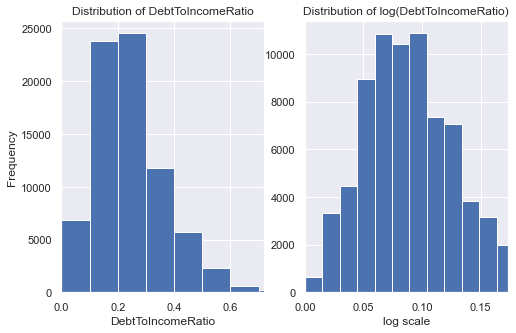

In [5]:
fig,ax=plt.subplots(1,2,figsize=(8,5))
step=0.1
bins=np.arange(0,data["DebtToIncomeRatio"].max()+step,step)
ax[0].hist(data=data,x="DebtToIncomeRatio",bins=bins)
ax[0].set(xlabel="DebtToIncomeRatio",ylabel="Frequency",
          title="Distribution of DebtToIncomeRatio",xlim=(0,0.72));#removing outliers
ax[1].hist(np.log10(data["DebtToIncomeRatio"]+1),bins=70)
ax[1].set(title='Distribution of log(DebtToIncomeRatio)',xlabel="log scale",
          xlim=[0,np.log10(0.49+1)]);

## Distribution of `RevolvingCreditBalance`
According to the first histogram (before a log transformation) the major bulk of the data is accumulated on the left side of the  x-axis. Furthermore, 97 % of the data lie between 1 and 142000. As a result, the data is skewed to the right. It seems the distributaion of this data could have possible come from a Gamma distribution. However, applying a log transform to `RevolvingCreditBalance` after removing very small values or big values,we can see that the distribution of log `RevolvingCreditBalance` could have almost come from a Normal distribution except for that left tail.

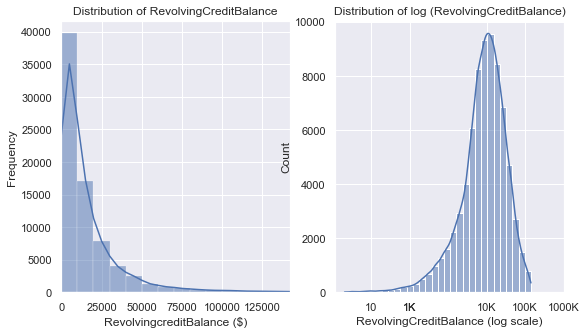

In [6]:
fig,ax=plt.subplots(1,2,figsize=(9,5))
step=10000
mask=(data["RevolvingCreditBalance"]>1)&(data["RevolvingCreditBalance"]<142000)
bins=np.arange(data["RevolvingCreditBalance"].min(),data["RevolvingCreditBalance"].max()+step,step)
sb.histplot(data=data,x="RevolvingCreditBalance",bins=bins,kde=True,ax=ax[0])
ax[0].set(xlim=(0,142000),xlabel="RevolvingcreditBalance ($)",
          title="Distribution of RevolvingCreditBalance",ylabel="Frequency")
sb.histplot(data=data[mask],x="RevolvingCreditBalance",bins=30,kde=True,
            log_scale=True,ax=ax[1])
ax[1].set(title="Distribution of log (RevolvingCreditBalance)",
       xlabel="RevolvingCreditBalance (log scale)",xticks=[10,100,100,10000,100000,1000000],
         xticklabels=[10,100,"1K","10K","100K","1000K"]);

## Distribution of `AvailableBankcardCredit`
The distribution of `AvailableBankcardCredit` is skewed to the right as well. Also, only 2.92% of the vlues are less than 1 and 1% values are larger than 84000. However, applying a log transformation after we have removed the really small and very big values, we see that the distribution of log(`AvailableBankcardCredit`) becomes more symmetric with some extended left tail.

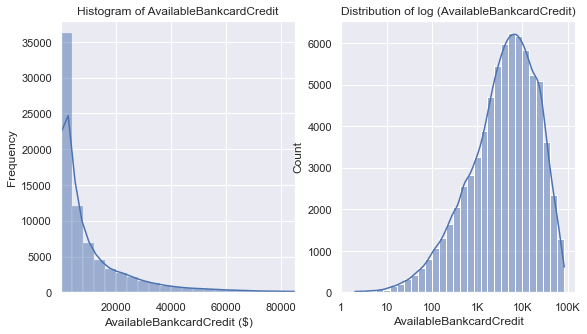

In [7]:
step=4000
bins=np.arange(data["AvailableBankcardCredit"].min(),data["AvailableBankcardCredit"].max()+step,step)
mask=(data["AvailableBankcardCredit"]>1)&(data["AvailableBankcardCredit"]<84000)
fig,ax=plt.subplots(1,2,figsize=(9.2,5))
sb.histplot(data=data,x="AvailableBankcardCredit",bins=bins,kde=True,ax=ax[0])
ax[0].set(title="Histogram of AvailableBankcardCredit",
          xlabel="AvailableBankcardCredit ($)",ylabel="Frequency",xlim=[1,85000]);
sb.histplot(data=data[mask],x="AvailableBankcardCredit",bins=30,kde=True,log_scale=True,
           ax=ax[1])
ax[1].set(title="Distribution of log (AvailableBankcardCredit)",
          xlabel="AvailableBankcardCredit",xticks=[1,10,100,1000,10000,100000],
         xticklabels=[1,10,100,"1K","10K","100K"]);

## Distribution of `StatedMonthlyIncome`
The data appears to be skewed to the right. Only 2% of the data lie outside of the range
[1200,21000]. After applying a log transformation the distribution becomes more symmetric and it appears to be almost bimodal.

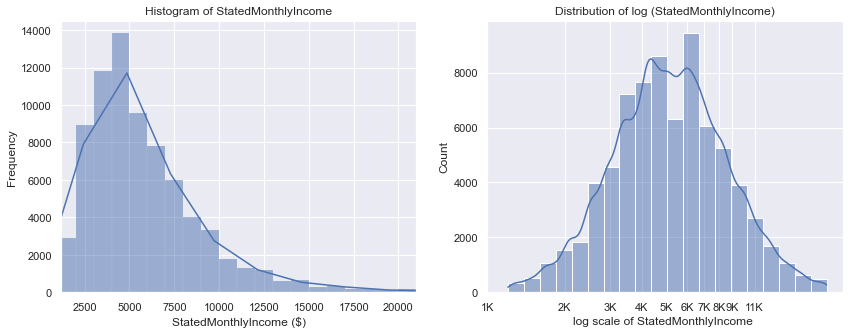

In [8]:
step=1000
bins=np.arange(data["StatedMonthlyIncome"].min(),data["StatedMonthlyIncome"].max()+step,step)
mask=(data['StatedMonthlyIncome']<=21000)&(data['StatedMonthlyIncome']>1200)
fig,ax=plt.subplots(1,2,figsize=(14,5))
sb.histplot(data=data,x="StatedMonthlyIncome",bins=bins,kde=True,ax=ax[0])
ax[0].set(title="Histogram of StatedMonthlyIncome",
          xlabel="StatedMonthlyIncome ($)",ylabel="Frequency",xlim=[1200,21000]);
sb.histplot(data=data[mask],x="StatedMonthlyIncome",bins=20,kde=True,log_scale=True,
           ax=ax[1]);
plt.xlabel("StatedMonthlyIncome",fontsize=12)
plt.title("Distribution of log (StatedMonthlyIncome)",fontsize=12)
plt.xlabel("log scale of StatedMonthlyIncome ",fontsize=12)
plt.xticks([k for k in range(1000,10000,1000)]+[11000],[str(k)+"K" for k in range(1,10)]+["11K"]);
ax[1].set(xticks=[k for k in range(1000,10000,1000)]+[11000],
          xticklabels=[str(k)+"K" for k in range(1,10)]+["11K"]);


## Distribution of `TotalInquiries`
The frequency of total inquiries decreasing gradually and the distribution of `TotalInquiries` seems to be skewed to the right. Only 1% of the values are larger than 18 so these values can be considered unusual.


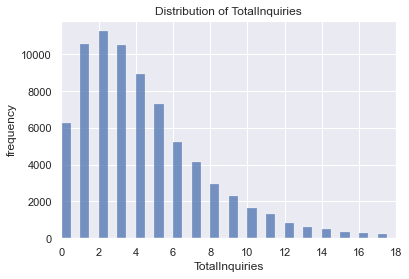

In [9]:
step=0.5
bins=np.arange(data["TotalInquiries"].min(),data["TotalInquiries"].max()+step,step)
sb.histplot(data=data,x="TotalInquiries",bins=bins,kde=False)
plt.xlim([0,18])#remove outliers
plt.title("Distribution of TotalInquiries")
plt.ylabel("frequency");

## Distribution of CurrentDelinquencies
90% of the borrowers have 0 or 1 delinquencies. Anything larger than 2 can be considered as an usual value.

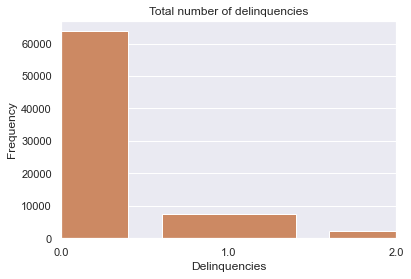

In [10]:
sb.countplot(data=data,x="CurrentDelinquencies",color=sb.color_palette()[1])
plt.title("Total number of delinquencies")
plt.xlabel("Delinquencies")
plt.ylabel("Frequency");
plt.xlim([0,2]);

* `RevovlingCreditBalance` vs `ProsperScore`
* `AvailableBankcardCredit` vs `ProsperScore`
* `DebtoToIncomeRatio` vs `ProsperScore`
* `StatedMonthlyIncome` vs `ProsperScore`

The violin plots below clearly indicate that there is a relationshp between `ProsperScore` and `RevolvingCreditBalance`,`AvailableBankcardCredit`,`DebtToIncomeRatio`and `StatedMonthlyIncome`. In fact, these plots showcase that the distributions of the aforementioned attributes are clearly distinguished for low and high scores. There are two interessting things that stand out from the violin plots. In case of `RevolvingCreditBalance` vs `ProsperScore` we see an increasing trend of medians, although I expected a decreasing trend. As far `DebtToIncomeRatio` vs `ProsperScore` is concerned, there was a decreasing trend as I expected with some jump up at at score 11 which I was not expecting. 

In [11]:
data_sample=data.sample(n=500,replace=False,random_state=1)
cols=["RevolvingCreditBalance","AvailableBankcardCredit",'DebtToIncomeRatio',
      'StatedMonthlyIncome',]#Features for investigation
outliers_excl={0:[0,149000],1:[0,84000],2:[0.04,0.72],3:[1200,21000]}

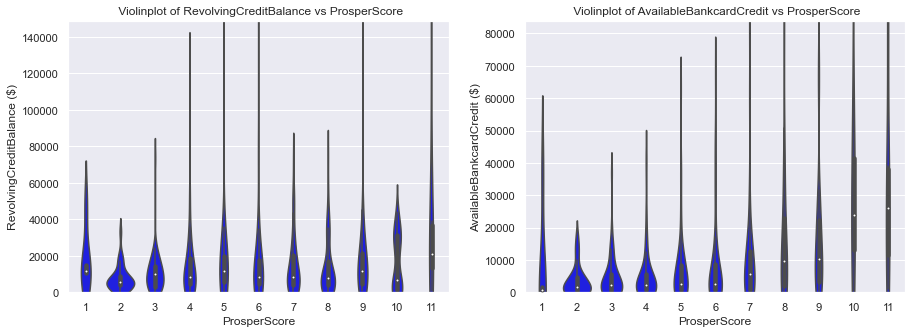

In [12]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
for j in range(2):
    sb.violinplot(data=data_sample,x="ProsperScore",y=cols[j],color="blue",ax=ax[j],kind="violin")
    ax[j].set(title=f" Violinplot of {cols[j]} vs ProsperScore",ylim=outliers_excl[j],ylabel=f"{cols[j]} ($)")

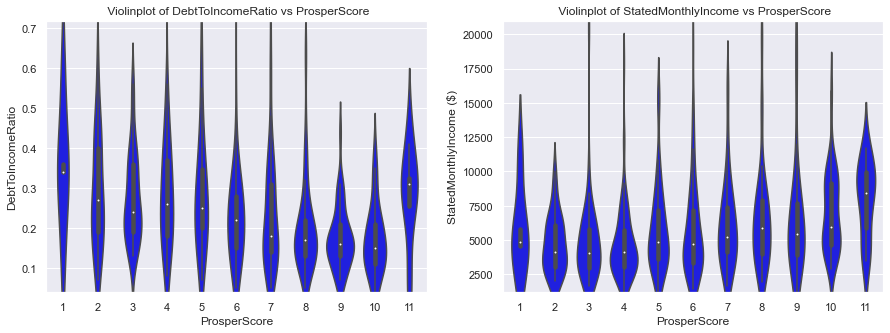

In [13]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
for j in range(2):
    sb.violinplot(data=data_sample,x="ProsperScore",y=cols[2+j],color="blue",ax=ax[j],kind="violin")
    ax[j].set(title=f" Violinplot of {cols[2+j]} vs ProsperScore",ylim=outliers_excl[2+j])
    if j==1:
        ax[j].set(ylabel=f"{cols[2+j]} ($)")

* `CurrentDelinquencies` vs `ProsperScore`
* `TotalInquires` vs `ProsperScore`

From the pointplot `CurrentDelinquencies` vs `ProsperScore`, we  see that the average   delinquencies drops down drastically after score 1(high risk). Another thing we can observe that high scores (9,10,11, i.e. low risk) are assigned with very low number of delinquencies.

From the pointplot `TotalInquiries` vs `ProsperScore` we see a decreasing trend between 
`ProsperScore` and the average number of `CurrentDelinquencies`. And again we see that good scores are assigned to the borrowers with low number of total inquiries 

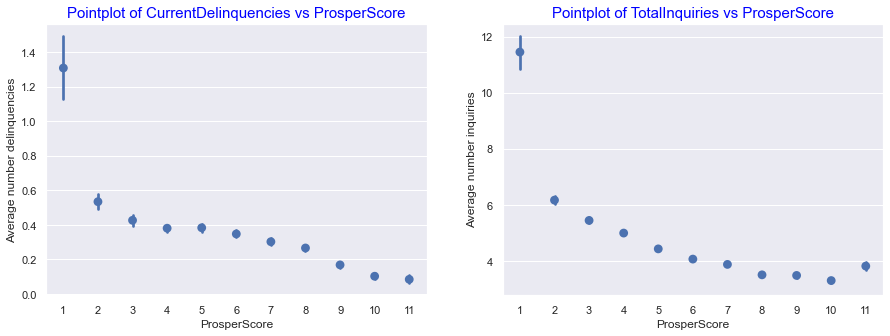

In [14]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sb.pointplot(data=data,x="ProsperScore",y="CurrentDelinquencies",
             estimator=np.mean,join=False,ax=ax[0])#pointplot between ProsperScore and 
#CurrentDelinquencies
ax[0].set_title('Pointplot of CurrentDelinquencies vs ProsperScore',color="blue",
                fontsize=15)
ax[0].set_ylabel('Average number delinquencies');
sb.pointplot(data=data,x="ProsperScore",y="TotalInquiries",
             estimator=np.mean,join=False,ax=ax[1])#pointplot between ProsperScore and 
#Totalinquiries
ax[1].set_title('Pointplot of TotalInquiries vs ProsperScore',fontsize=15,color="blue")
ax[1].set_ylabel('Average number inquiries');


## `IsBorrowerHomeowner` vs `ProsperScore`

It seems that there is some interaction between `ProsperScore`and `IsBorrowerHomeowner` especially for the range of big scores [5,11]. We can see that the higher the score gets in the range [5,11] the more frequently it is assigned to home owners.

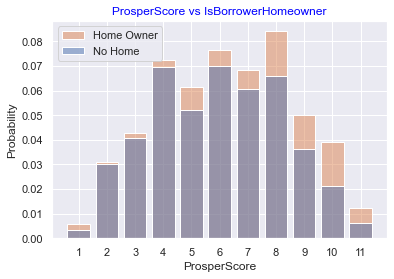

In [15]:
sb.histplot(data=data,x="ProsperScore",hue="IsBorrowerHomeowner",alpha=0.5,discrete=True,
            stat="probability",shrink=0.8)#Displays proportions instead of pure counts
labels=["Home Owner","No Home"]
plt.legend(labels,loc="upper left")
plt.xticks([k for k in range(1,12)],[str(k) for k in range(1,12)])
plt.title("ProsperScore vs IsBorrowerHomeowner",color="blue");

## `PropserScore` vs `RevolvingCreditBalance` and `IsBorrowerHomeowner`

As it is indicated below, the dynamic of `ProsperScore` vs `RevovlingCreditbalance` is affected by `IsBorrowerhomeowner` When the borrowers do not possess a home then good scores assigned mostly to those borrowers having low revolving credit balance. However, when the borrowers have a home property then we can see that good scores are assigned even to some borrowers having high revolving credit balance (probably the investors have more trust 
in home owners) and this explains the increasing trend we saw in the violin plot between `RevolvingCreditBalance` and `PropserScore`

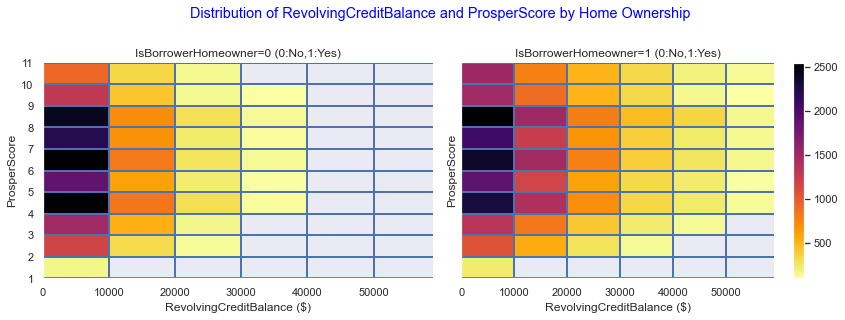

In [16]:
#Check how IsBorrowerHomeowner affects the relationship of "RevolvingCreditBalance" and PropserScore
bin_x=np.arange(data["RevolvingCreditBalance"].min(),data["RevolvingCreditBalance"].max()+10000,10000)
bin_y=[k for k in range(1,12)]
g=sb.FacetGrid(data=data,col="IsBorrowerHomeowner",height=4,aspect=1.5)
g.map_dataframe(plt.hist2d,x="RevolvingCreditBalance",y="ProsperScore_int",cmin=100,bins=[bin_x,bin_y],
                cmap="inferno_r")
plt.xlim([0,59000])#This removes ouliers from RevolvingCreditBalance
g.set(ylabel="ProsperScore")
g.set(xlabel="RevolvingCreditBalance ($)")
g.set_titles(col_template="IsBorrowerHomeowner={col_name} (0:No,1:Yes)")
plt.yticks([k for k in range(1,12)],[k for k in range(1,12)])
plt.suptitle('Distribution of RevolvingCreditBalance and ProsperScore by Home Ownership',x=0.5,
             y=1.1,color="blue")
plt.colorbar();

## `ProsperScore` vs `DebtToIncomeRatio` and `IncomeVerifiable`
As it is indicated below, the attribute `IncomeVerifiable` affects the relationship between `DebtToIncomeratio` and `ProsperScore`. In fact, the borrowers who can justify their income are assigned fairly high scores even if their debt to income ratio is kind of big and this fact explains to some extent the reason we saw a jump up at score 11 (low risk) after a decreasing trend of`DebtToIncomeratio` vs `ProsperScore`. However, we have to take into our account that we did not have much data about the borrowers whose income wasn't verifiable.

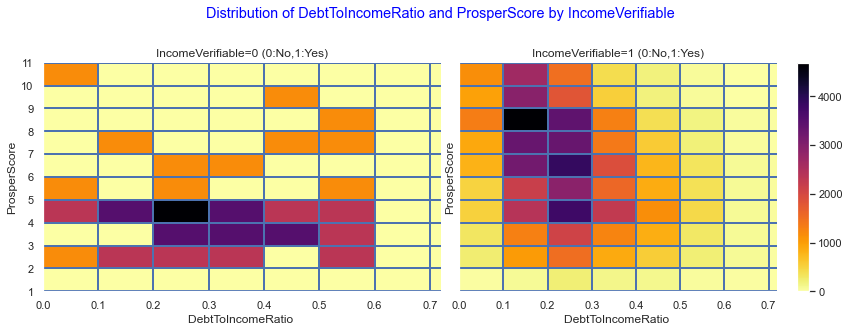

In [17]:
#Interaction between ProsperScore DebToIncomeRatio and InComeVeryfing
bin_x=np.arange(data["DebtToIncomeRatio"].min(),data["DebtToIncomeRatio"].max()+0.1,0.1)
bin_y=[k for k in range(1,12)]
g=sb.FacetGrid(data=data,col="IncomeVerifiable",height=4,aspect=1.5)
g.map_dataframe(plt.hist2d,x="DebtToIncomeRatio",y="ProsperScore_int",cmin=0,bins=[bin_x,bin_y],
                cmap="inferno_r")
plt.xlim([0,0.72])#This removes ouliers from DebtToIncomeRatio
g.set(ylabel="ProsperScore")
g.set(xlabel="DebtToIncomeRatio ")
g.set_titles(col_template="IncomeVerifiable={col_name} (0:No,1:Yes)")
plt.suptitle('Distribution of DebtToIncomeRatio and ProsperScore by IncomeVerifiable',x=0.5,
             y=1.1,color="blue")
plt.yticks([k for k in range(1,12)],[k for k in range(1,12)])
plt.colorbar();

In [18]:
!jupyter nbconvert prosper_slide_deck.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook prosper_slide_deck.ipynb to slides
[NbConvertApp] Writing 1146112 bytes to prosper_slide_deck.slides.html
